<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/TensorFlow_dan_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup TensorFlow dan Keras

In [255]:
import sys
assert sys.version_info >= (3,5)

In [256]:
from os import X_OK
import sklearn
assert sklearn.__version__ >= "0.20"

try:
  %tensorflow_version 2.X
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [257]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [258]:
import numpy as np
import os

np.random.seed(42)

In [259]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [260]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Perceptrons

In [261]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np
import pandas as pd

In [262]:
tf.__version__

'2.18.0'

In [263]:
keras.__version__

'3.8.0'

In [264]:
df = pd.read_csv("6 class csv.csv")

In [265]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [266]:
df.tail()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [267]:
df.isnull().values.any()

np.False_

In [268]:
df = df.drop(columns=['Star color', 'Spectral Class'])

In [269]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


([<matplotlib.axis.YTick at 0x7db8a02a3190>,
 [Text(0, 0, 'Temperature (K)'),
  Text(0, 1, 'Luminosity(L/Lo)'),
  Text(0, 2, 'Radius(R/Ro)'),
  Text(0, 3, 'Absolute magnitude(Mv)'),
  Text(0, 4, 'Star type')])

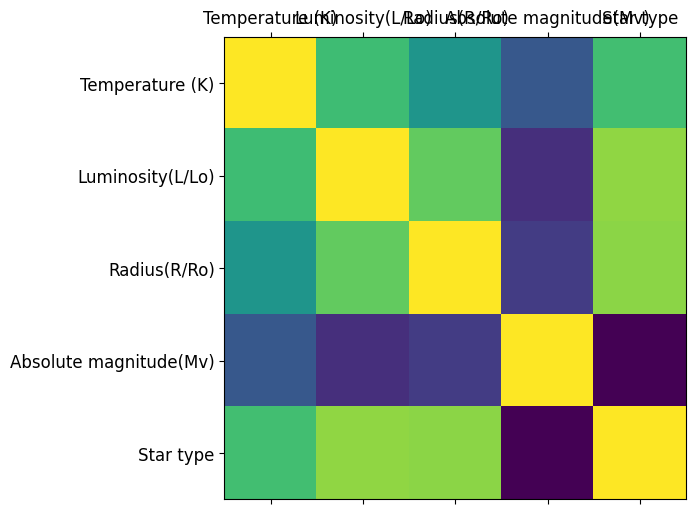

In [270]:
import matplotlib.pyplot as plt

corr = df.corr()
fig,ax = plt.subplots(figsize = (6,6))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)

In [271]:
brown_dwarf = len(df.loc[df['Star type'] == 0])
red_dwarf = len(df.loc[df['Star type'] == 1])
white_dwarf = len(df.loc[df['Star type'] == 2])
main_sequence = len(df.loc[df['Star type'] == 3])
supergiant = len(df.loc[df['Star type'] == 4])
hypergiant = len(df.loc[df['Star type'] == 5])

print('Brown Dwarf: {}'.format(brown_dwarf))
print('Red Dwarf: {}'.format(red_dwarf))
print('White Dwarf: {}'.format(white_dwarf))
print('Main Sequence: {}'.format(main_sequence))
print('Supergiant: {}'.format(supergiant))
print('Hypergiant: {}'.format(hypergiant))
print("Total bintang dalam dataset = {}".format(len(df)))

Brown Dwarf: 40
Red Dwarf: 40
White Dwarf: 40
Main Sequence: 40
Supergiant: 40
Hypergiant: 40
Total bintang dalam dataset = 240


In [272]:
x = np.array(df.drop(columns = ['Star type']))
y = np.array(df['Star type'], dtype ='float')
y.shape = (len(y),1)

In [273]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)

In [274]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

In [275]:
# prompt: use mlp as model

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=x_f_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(x_f_train, y_f_train, epochs=200)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0370 - loss: 1.8101      
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3051 - loss: 1.7686 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4581 - loss: 1.7277 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5143 - loss: 1.6972 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5332 - loss: 1.6719 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5650 - loss: 1.6462 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7225 - loss: 1.6241 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7316 - loss: 1.5775 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7695 - loss: 1.5517 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7760 - loss: 1.5501 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7756 - loss: 1.5145 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8035 - loss: 1.49

In [276]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9931 - loss: 0.2338 
Loss % = 24.897749722003937 , Accuracy % = 98.61111044883728 


In [277]:
arr = np.array([[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]])

In [278]:
z = np.round(model.predict(x_f_test))

print('_____________________________________________________')
print("Prediction : P-Class : O-Class ")

c1=c2=c3=c4=c5=c6=c7=c8=c9=c10=c11=c12=0  #counter variables

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        print("{}  :  {} :  {}".format(z[i],0,y_test[i]))
        c1+=1
    elif np.array_equal(z[i],arr[1]):
        print("{}  :  {} :  {}".format(z[i],1,y_test[i]))
        c2+=1
    elif np.array_equal(z[i],arr[2]):
        print("{}  :  {} :  {}".format(z[i],2,y_test[i]))
        c3+=1
    elif np.array_equal(z[i],arr[3]):
        print("{}  :  {} :  {}".format(z[i],3,y_test[i]))
        c4+=1
    elif np.array_equal(z[i],arr[4]):
        print("{}  :  {} :  {}".format(z[i],4,y_test[i]))
        c5+=1
    elif np.array_equal(z[i],arr[5]):
        print("{}  :  {} :  {}".format(z[i],5,y_test[i]))
        c6+=1

print('_____________________________________________________')
print("Predicted NO. of Brown Dwarfs = {}".format(c1))
print("Predicted NO. of Red Dwarfs = {}".format(c2))
print("Predicted NO. of White Dwarfs = {}".format(c3))
print("Predicted NO. of Main Sequence stars = {}".format(c4))
print("Predicted NO. of Supergiants = {}".format(c5))
print("Predicted NO. of Hypergiants = {}".format(c6))
print("Total tested stars = {}".format(len(z)))

m = y_test

print('_____________________________________________________')

for i in range(0,len(m)):
    if m[i] == 0:
        c7+=1
    elif m[i] == 1 :
        c8+=1
    elif m[i] == 2 :
        c9+=1
    elif m[i] == 3 :
        c10+=1
    elif m[i] == 4 :
        c11+=1
    elif m[i] == 5 :
        c12+=1


print("Original NO. of Brown Dwarfs = {}".format(c7))
print("Original NO. of Red Dwarfs = {}".format(c8))
print("Original NO. of White Dwarfs = {}".format(c9))
print("Original NO. of Main Sequence stars = {}".format(c10))
print("Original NO. of Supergiants = {}".format(c11))
print("Original NO. of Hypergiants = {}".format(c12))
print("Total tested stars = {}".format(len(x_test)))

print('_____________________________________________________')
print('Accuracy = {}%'.format((val_acc*100)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
_____________________________________________________
Prediction : P-Class : O-Class 
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 1. 0. 0. 0.]  :  2 :  [2.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 0. 1. 0.]  :  4 :  [4.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[1. 0. 0. 0. 0. 0.]  :  0 :  [0.]
[0. 1. 0. 0. 0. 0.]  :  1 :  [1.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 1. 0. 0.]  :  3 :  [3.]
[0. 0. 0. 0. 0. 1.]  :  5 :  [5.]
[0. 0. 0. 1. 0. 0.]  :  3 

Total Counted Stars = 240


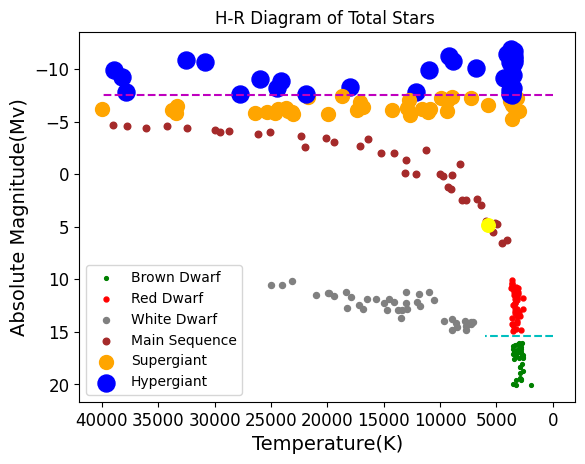

In [279]:
df1 = pd.read_csv('6 class csv.csv')



x1 = np.array(df1.drop(columns = ['Star color','Spectral Class']))
y1 = np.array(df1['Star type'], dtype ='float')
y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    if x1[i][4] == 0:
        a = plt.scatter(x1[i][0],x1[i][3], s = 30 , c = 'green', marker = '.')
    elif x1[i][4]== 1:
        b = plt.scatter(x1[i][0],x1[i][3],s = 50 , c = 'red',marker = '.')
    elif x1[i][4]== 2:
        c = plt.scatter(x1[i][0],x1[i][3],s = 75 , c = 'gray',marker = '.')
    elif x1[i][4]== 3:
        d = plt.scatter(x1[i][0],x1[i][3],s = 90 , c = 'brown',marker = '.')
    elif x1[i][4]== 4:
        e = plt.scatter(x1[i][0],x1[i][3],s = 100 , c = 'orange',marker = 'o')
    elif x1[i][4]== 5:
        f = plt.scatter(x1[i][0],x1[i][3],s = 150 , c = 'blue',marker = 'o')


    c1+=1


print("Total Counted Stars = {}".format(c1))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Total Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.scatter(5778,4.83,s = 95, c= 'yellow',marker = 'o' )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Trained Stars = 168


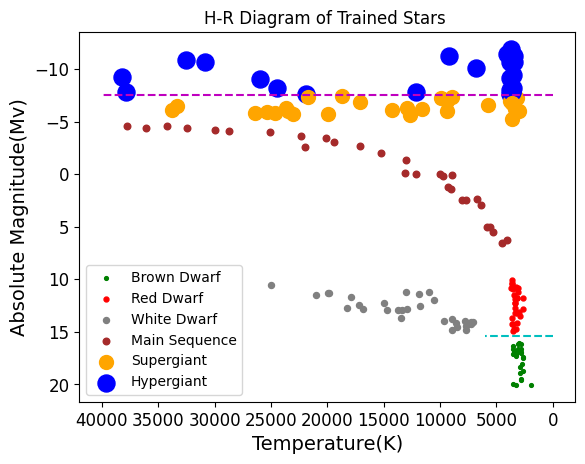

In [280]:
c2=0

for i in range(0,len(y_train)):
    if y_train[i] == 0:
        a = plt.scatter(x_train[i][0],x_train[i][3], s = 30 , c = 'green', marker = '.')
    elif y_train[i]== 1:
        b = plt.scatter(x_train[i][0],x_train[i][3],s = 50 , c = 'red',marker = '.')
    elif y_train[i]== 2:
        c = plt.scatter(x_train[i][0],x_train[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_train[i]== 3:
        d = plt.scatter(x_train[i][0],x_train[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_train[i]== 4:
        e = plt.scatter(x_train[i][0],x_train[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_train[i]== 5:
        f = plt.scatter(x_train[i][0],x_train[i][3],s = 150 , c = 'blue',marker = 'o')
    c2+=1


print("Total Trained Stars = {}".format(c2))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Trained Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Tested Stars = 72


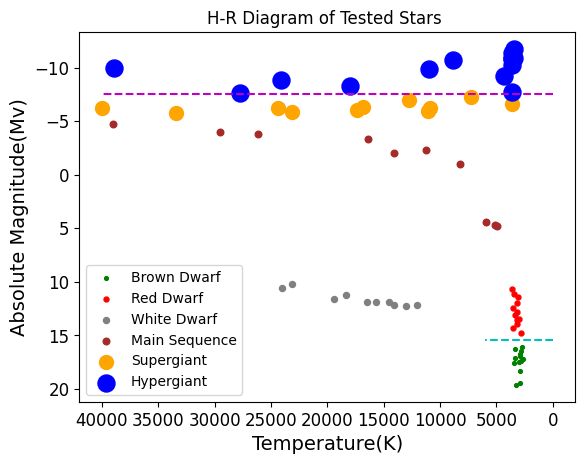

In [281]:
c3=0

for i in range(0,len(y_test)):
    if y_test[i] == 0:
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif y_test[i]== 1:
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif y_test[i]== 2:
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif y_test[i]== 3:
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif y_test[i]== 4:
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif y_test[i]== 5:
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c3+=1


print("Total Tested Stars = {}".format(c3))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Tested Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Total Predicted Stars = 72


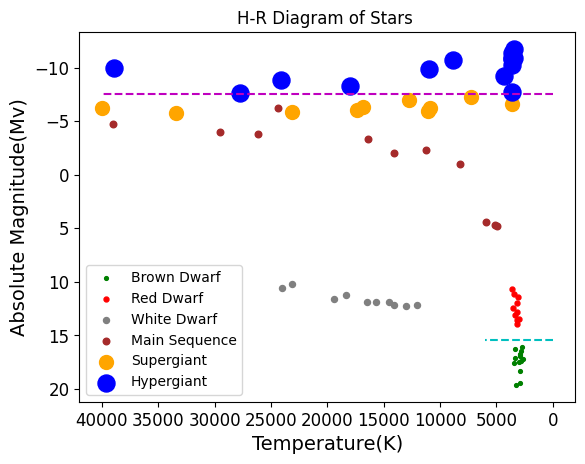

Accuracy = 98.61111044883728 %


In [282]:
c4 = 0

for i in range(0,len(z)):
    if np.array_equal(z[i],arr[0]):
        a = plt.scatter(x_test[i][0],x_test[i][3], s = 30 , c = 'green', marker = '.')
    elif np.array_equal(z[i],arr[1]):
        b = plt.scatter(x_test[i][0],x_test[i][3],s = 50 , c = 'red',marker = '.')
    elif np.array_equal(z[i],arr[2]):
        c = plt.scatter(x_test[i][0],x_test[i][3],s = 75 , c = 'gray',marker = '.')
    elif np.array_equal(z[i],arr[3]):
        d = plt.scatter(x_test[i][0],x_test[i][3],s = 90 , c = 'brown',marker = '.')
    elif np.array_equal(z[i],arr[4]):
        e = plt.scatter(x_test[i][0],x_test[i][3],s = 100 , c = 'orange',marker = 'o')
    elif np.array_equal(z[i],arr[5]):
        f = plt.scatter(x_test[i][0],x_test[i][3],s = 150 , c = 'blue',marker = 'o')
    c4+=1

print("Total Predicted Stars = {}".format(c4))
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Stars ")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
print("Accuracy = {} %".format(val_acc*100))

##Regresi Keras

In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

In [284]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [285]:
from sklearn import preprocessing
df_scaled= preprocessing.normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,0.395564,0.000000,0.0,0.118669,0.001831,0.761826,0.495187,0.020511,0.058595
1,0.392536,0.000000,0.0,0.117761,0.001817,0.766900,0.491397,0.020354,0.044989
2,0.273422,0.117181,0.0,0.187489,0.000000,0.766403,0.488458,0.222027,0.033115
3,0.268004,0.114859,0.0,0.183774,0.000000,0.751218,0.478781,0.294200,0.033087
4,0.145460,0.096973,0.0,0.140626,0.000000,0.716605,0.604618,0.263673,0.032446


In [286]:
y = df_scaled['Strength']
X = df_scaled.drop('Strength', axis=1)

In [287]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
196,0.140864,0.000000,0.072711,0.119810,0.005426,0.728124,0.655413,0.020258
631,0.236848,0.000000,0.000000,0.134093,0.000000,0.774676,0.570622,0.005101
81,0.246469,0.164287,0.000000,0.120374,0.011056,0.658772,0.680651,0.002319
526,0.275139,0.014562,0.108063,0.118026,0.008354,0.721952,0.613889,0.002299
830,0.138411,0.162334,0.126450,0.152936,0.016233,0.715978,0.633102,0.023923
...,...,...,...,...,...,...,...,...
87,0.213446,0.149777,0.000000,0.107878,0.008350,0.748961,0.599184,0.002237
330,0.178029,0.000000,0.090241,0.103370,0.008656,0.783964,0.577730,0.010099
466,0.138300,0.000000,0.090989,0.121076,0.007195,0.784162,0.580600,0.072675
121,0.373786,0.093486,0.000000,0.142511,0.007004,0.670533,0.614977,0.022034


In [289]:
model = Sequential()
model.add(Dense(400, input_dim=8,kernel_initializer='normal', activation='relu'))
model.add(Dense(130,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 400)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 130)            │        52,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,861 (218.21 KB)

 Trainable params: 55,861 (218.21 KB)

 Non-trainable params: 0 (0.00 B)

In [290]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(400, 130),
                             activation='relu',
                             solver='adam',
                             random_state=42,
                             max_iter=1000)

mlp_regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(400, 130), max_iter=1000, random_state=42)

In [291]:
model.compile(loss='mse', optimizer=optimizers.Adam(0.000001), metrics=['mse','mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0076 - mae: 0.0861 - mse: 0.0076 - val_loss: 0.0072 - val_mae: 0.0839 - val_mse: 0.0072
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mae: 0.0817 - mse: 0.0069 - val_loss: 0.0065 - val_mae: 0.0793 - val_mse: 0.0065
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0765 - mse: 0.0061 - val_loss: 0.0058 - val_mae: 0.0748 - val_mse: 0.0058
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mae: 0.0721 - mse: 0.0054 - val_loss: 0.0051 - val_mae: 0.0704 - val_mse: 0.0051
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mae: 0.0675 - mse: 0.0048 - val_loss: 0.0046 - val_mae: 0.0663 - val_mse: 0.0046
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mae: 0.0648 - mse: 0.0044 - val_loss: 0.0040 - val_mae: 0.0622 - val_mse: 0.0040
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0602 - mse: 0.0038 - val_loss: 

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


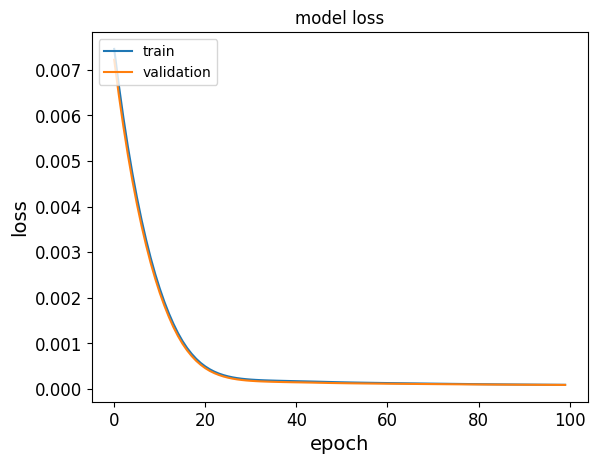

In [292]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [293]:
total_mean_absolute_errors = 50
epochs = 50
mean_absolute_errors = []
mean_squared_errors = []
r2_values = []

for i in range(0, total_mean_absolute_errors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)

    # Evaluate MAE
    mae = mean_absolute_error(y_test, model.predict(X_test))

    # Evaluate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Predictions and calculate R2
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    mean_absolute_errors.append(mae)
    mean_squared_errors.append(rmse)
    r2_values.append(r2)

    # Print the status of the run
    print(f"Run {i+1}/{total_mean_absolute_errors} - MAE: {mae}, RMSE: {rmse}, R2: {r2}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Run 1/50 - MAE: 0.007491194089688595, RMSE: 0.009039042688853036, R2: 0.4731601089359957
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Run 2/50 - MAE: 0.00707702923801722, RMSE: 0.008598137140983862, R2: 0.5233028975546641
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Run 3/50 - MAE: 0.006738375738839503, RMSE: 0.008229713131915305, R2: 0.5632799103948981
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Run 4/50 - MAE: 0.006437116187254861, RMSE: 0.007906974214904237, R2: 0.5968613645538946
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Run 5/50 - MAE: 0.006183054477840739, RMSE: 0.007620144570709121, R2: 0.625

In [296]:
mean_absolute_errors = np.array(mean_absolute_errors)
mean_squared_errors = np.array(mean_squared_errors)
r2_values = np.array(r2_values)
mean_mae, std_mae = np.mean(mean_absolute_errors), np.std(mean_absolute_errors)
mean_rmse, std_rmse = np.mean(mean_squared_errors), np.std(mean_squared_errors)
mean_r2, std_r2 = np.mean(r2_values), np.std(r2_values)
mean_mae, std_mae, mean_rmse, std_rmse, mean_r2, std_r2 = map(lambda x: round(x, 3), [mean_mae, std_mae, mean_rmse, std_rmse, mean_r2, std_r2])

In [297]:
print('\n')
print(f"Mean MAE: {mean_mae} | Std Dev MAE: {std_mae}")
print('\n')
print(f"Mean RMSE: {mean_rmse} | Std Dev RMSE: {std_rmse}")
print('\n')
print(f"Mean R2: {mean_r2} | Std Dev R2: {std_r2}")



Mean MAE: 0.005 | Std Dev MAE: 0.001


Mean RMSE: 0.006 | Std Dev RMSE: 0.001


Mean R2: 0.767 | Std Dev R2: 0.085
